This notebook demonstrates the application of logistic regression models on the Iris dataset.

In [2]:
import math

import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [3]:
iris = datasets.load_iris()

#### Logistic regression with two input features ($d=2$).

In [10]:
import numpy

class LogisticRegressionGradientDescent():
    """
    Logistic regression implementation (gradient descent)
    """

    def __init__(self, eta=0.1, n_steps=5):
        
        self.eta = eta
        self.n_steps = n_steps
            
    def fit(self, X, y):
        """

        Parameters
        ----------
        X : Array of shape [n_samples, n_features]
        y : Array of shape [n_samples, 1]
        """        

        # make sure that we have multidimensional numpy arrays
        X = numpy.array(X).reshape((X.shape[0], -1))
        # IMPORTANT: Make sure that we have a column vector! 
        y = numpy.array(y).reshape((len(y), 1))
        
        # prepend a column of ones
        ones = numpy.ones((X.shape[0], 1))
        X = numpy.concatenate((ones, X), axis=1)
        
        # starting point
        w = numpy.zeros((X.shape[1], 1))
        
        # gradient descent steps
        for i in range(self.n_steps):
            
            p_i = 1.0 / (1.0 + np.exp(-np.dot(X,w)))
            c = ((p_i - y) * X).sum(axis=0).reshape((-1,1))
            c = 1.0 / X.shape[0] * c
            w = w - self.eta * c
        self._w = w
        
    def predict(self, X):
        """
        Computes predictions for a new set of points.

        Parameters
        ----------
        X : Array of shape [n_samples, n_features]

        Returns
        -------
        predictions : Array of shape [n_samples, 1]
        """                     

        # make sure that we have multidimensional numpy arrays
        X = numpy.array(X).reshape((X.shape[0], -1))

        # prepend a column of ones
        ones = numpy.ones((X.shape[0], 1))
        X = numpy.concatenate((ones, X), axis=1)           

        # compute predictions
        predictions = np.dot(X, self._w)
        predictions = 1.0 / (1.0 + np.exp(-predictions))

        return predictions

In [11]:
# Consider two features 
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int32)

# fit logistic regression model
log_reg = LogisticRegressionGradientDescent(eta=1, n_steps=50000)
log_reg.fit(X, y)


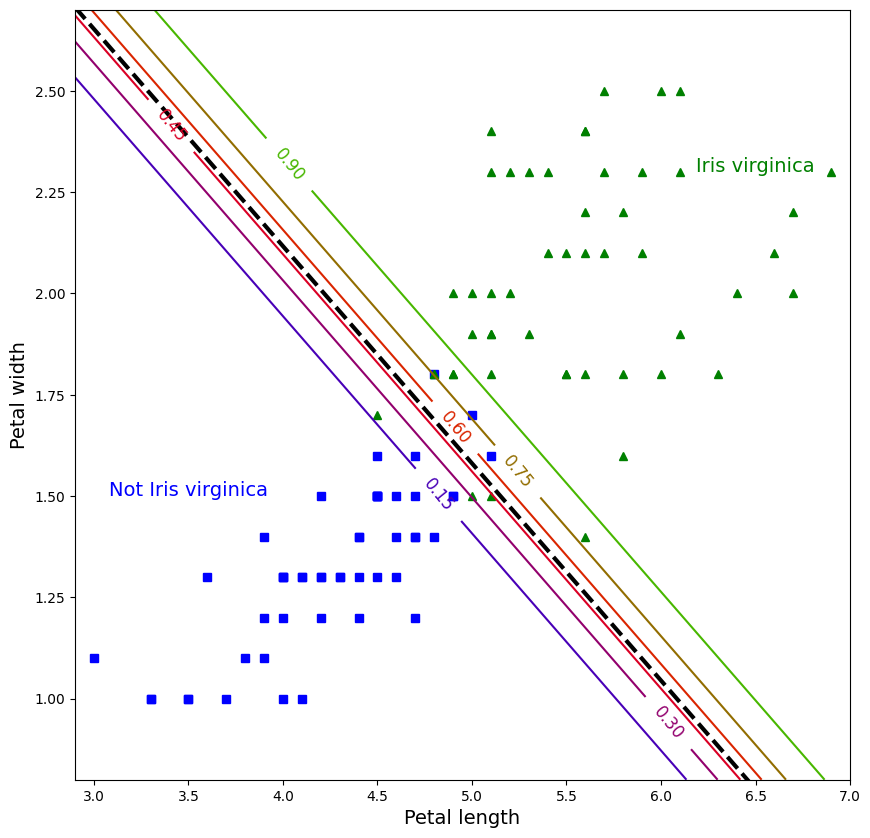

In [12]:
# generate mesh grid of points to visualize the decision surface
x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_proba = log_reg.predict(X_new)


# visualize results
plt.figure(figsize=(10, 10))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")
zz = y_proba.reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
left_right = np.array([2.9, 7])

boundary = -(log_reg._w[1] * left_right + log_reg._w[0]) / log_reg._w[2]
plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()